In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from skimage.transform import resize
from sklearn.manifold import TSNE

1. (25 points) Data visualization is an essential part of machine learning. In this ques-
tion, you will use python libraries (such as matplotlib) to create di
erent types of plots.
You have to include the legends in the plots to denote the class labels and other relevant
information.
Datasets: COVID-19| Face mask dataset|
1. Find the two CSVs present in the COVID-19 folder and explore the 
les. Speci
-
cally, check the number of columns, their names, type of columns (categorical or
continuous), and the possible data values/range for each column. Illustrate these
in your report. 5 marks
2. Use the 
le covid_19_india.csv and show the trend of con
rmed, and cured cases
along with the number of deaths in India for the time period of the data in one
plot. 5 marks
3. Use the 
le covid_vaccine_statewise.csv and plot the total number of doses
administered of Covishield, Covaxin, and Sputnik in the following cities: Kerala,
Delhi, Rajasthan, Haryana, Uttar Pradesh, Tamil Nadu for the time period of the
data. 5 marks
4. Use the Face mask dataset for the following tasks:
(a) Randomly select 5 images from each class and visualise them as images. 5
marks
(b) We can visualize only 2D or 3D data using scatter plots. For features dimen-
sions higher than three, we may use T-distributed Stochastic Neighbor Embed-
ding (t-SNE) to reduce the number of features. Use the t-SNE to reduce the
dataset to 2 dimensions and visualize the scatter plot. What is your inference
regarding the class separation? 5 marks

In [2]:
statewise_data = pd.read_csv("/Users/ramyanee/Downloads/ML/COVID-19/covid_vaccine_statewise.csv")
india_data = pd.read_csv("/Users/ramyanee/Downloads/ML/COVID-19/covid_19_india.csv")

In [3]:
statewise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [4]:
statewise_data.dtypes

Updated On                              object
State                                   object
Total Doses Administered               float64
Sessions                               float64
 Sites                                 float64
First Dose Administered                float64
Second Dose Administered               float64
Male (Doses Administered)              float64
Female (Doses Administered)            float64
Transgender (Doses Administered)       float64
 Covaxin (Doses Administered)          float64
CoviShield (Doses Administered)        float64
Sputnik V (Doses Administered)         float64
AEFI                                   float64
18-44 Years (Doses Administered)       float64
45-60 Years (Doses Administered)       float64
60+ Years (Doses Administered)         float64
18-44 Years(Individuals Vaccinated)    float64
45-60 Years(Individuals Vaccinated)    float64
60+ Years(Individuals Vaccinated)      float64
Male(Individuals Vaccinated)           float64
Female(Indivi

In [5]:
statewise_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Doses Administered,7621.0,9.188171e+06,3.746180e+07,7.0,135657.00,818202.0,6625243.00,513228400.0
Sessions,7621.0,4.792358e+05,1.911511e+06,0.0,6004.00,45470.0,342869.00,35010311.0
Sites,7621.0,2.282872e+03,7.275974e+03,0.0,69.00,597.0,1708.00,73933.0
First Dose Administered,7621.0,7.414415e+06,2.995209e+07,7.0,116632.00,661459.0,5387805.00,400150406.0
Second Dose Administered,7621.0,1.773755e+06,7.570382e+06,0.0,12831.00,138818.0,1166434.00,113077994.0
Male (Doses Administered),7461.0,3.620156e+06,1.737938e+07,0.0,56555.00,389785.0,2735777.00,270163622.0
Female (Doses Administered),7461.0,3.168416e+06,1.515310e+07,2.0,52107.00,334238.0,2561513.00,239518609.0
Transgender (Doses Administered),7461.0,1.162978e+03,5.931354e+03,0.0,8.00,113.0,800.00,98275.0
Covaxin (Doses Administered),7621.0,1.044669e+06,4.452259e+06,0.0,0.00,11851.0,757930.00,62367416.0
CoviShield (Doses Administered),7621.0,8.126553e+06,3.298414e+07,7.0,133134.00,756736.0,6007817.00,446825051.0


In [6]:
missing_values_statewise = statewise_data.isnull().sum()
missing_values_statewise

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [7]:
#percentage missing value
missing_values_statewise_percentage = missing_values_statewise/len(statewise_data)*100
missing_values_statewise_percentage

Updated On                              0.000000
State                                   0.000000
Total Doses Administered                2.855322
Sessions                                2.855322
 Sites                                  2.855322
First Dose Administered                 2.855322
Second Dose Administered                2.855322
Male (Doses Administered)               4.894837
Female (Doses Administered)             4.894837
Transgender (Doses Administered)        4.894837
 Covaxin (Doses Administered)           2.855322
CoviShield (Doses Administered)         2.855322
Sputnik V (Doses Administered)         61.822817
AEFI                                   30.681963
18-44 Years (Doses Administered)       78.304653
45-60 Years (Doses Administered)       78.304653
60+ Years (Doses Administered)         78.304653
18-44 Years(Individuals Vaccinated)    52.415551
45-60 Years(Individuals Vaccinated)    52.402804
60+ Years(Individuals Vaccinated)      52.402804
Male(Individuals Vac

In [8]:
statewise_data_log = statewise_data.copy()
statewise_data_log['Total Doses Administered_log'] = statewise_data_log['Total Doses Administered'].apply(lambda x: np.log(x) if x != 0 else 0)
statewise_data_log['Sessions_log'] = statewise_data_log['Sessions'].apply(lambda x: np.log(x) if x != 0 else 0)
statewise_data_log['First Dose Administered_log'] = statewise_data_log['First Dose Administered'].apply(lambda x: np.log(x) if x != 0 else 0)
statewise_data_log['Second Dose Administered_log'] = statewise_data_log['Second Dose Administered'].apply(lambda x: np.log(x) if x != 0 else 0)


In [9]:
statewise_data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [10]:
s_ = statewise_data_log.copy()

In [11]:
len(s_['First Dose Administered_log'].unique())

7368

In [12]:
india_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [13]:
india_data.dtypes


Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [14]:
india_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Sno,18110.0,9055.500000,5228.051023,1.0,4528.25,9055.5,13582.75,18110.0
Cured,18110.0,278637.518056,614890.894424,0.0,3360.25,33364.0,278869.75,6159676.0
Deaths,18110.0,4052.402264,10919.076411,0.0,32.00,588.0,3643.75,134201.0
Confirmed,18110.0,301031.401822,656148.872965,0.0,4376.75,39773.5,300149.75,6363442.0


In [15]:
missing_values_india = india_data.isnull().sum()
missing_values_india


Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [16]:
missing_values_india_percentage = missing_values_india/len(india_data)*100
missing_values_india_percentage

Sno                         0.0
Date                        0.0
Time                        0.0
State/UnionTerritory        0.0
ConfirmedIndianNational     0.0
ConfirmedForeignNational    0.0
Cured                       0.0
Deaths                      0.0
Confirmed                   0.0
dtype: float64

In [17]:
india_data.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1


In [18]:
india_data_copy = india_data.copy()
india_data_copy['Date'] = pd.to_datetime(india_data_copy['Date'])
#india_data_copy = india_data.set_index('Date')

In [19]:
india_data_copy.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1


In [20]:
Confirmed_agg = india_data_copy.groupby([india_data_copy['Date'].dt.year, india_data_copy['Date'].dt.month]).agg({'Confirmed':sum})
Cured_agg = india_data_copy.groupby([india_data_copy['Date'].dt.year, india_data_copy['Date'].dt.month]).agg({'Cured':sum})
Deaths = india_data_copy.groupby([india_data_copy['Date'].dt.year, india_data_copy['Date'].dt.month]).agg({'Deaths':sum})

In [21]:
from matplotlib.legend import Legend

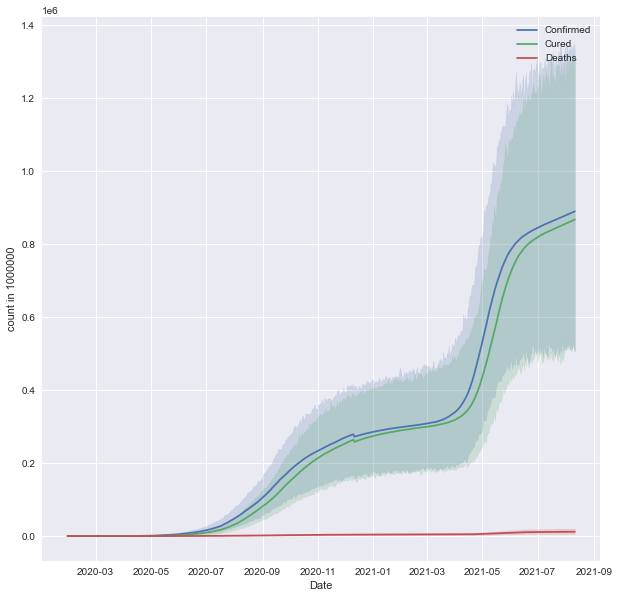

In [22]:
fig, a = plt.subplots(1,1,figsize=(10,10));
sns.lineplot(
             x=india_data_copy['Date'], 
             y=india_data_copy['Confirmed'],label = "Confirmed").set_ylabel('count in 1000000') ;
sns.lineplot(
             x=india_data_copy['Date'], 
             y=india_data_copy['Cured'],label = "Cured");
sns.lineplot(
             x=india_data_copy['Date'], 
             y=india_data_copy['Deaths'], label = "Deaths");

plt.show();

In [23]:
idc = india_data_copy.drop(columns='Sno')


In [24]:

idc['Confirmed_log'] = idc['Confirmed'].apply(lambda x: np.log(x) if x != 0 else 0)
idc['Cured_log'] = idc['Cured'].apply(lambda x: np.log(x) if x != 0 else 0)
idc['Deaths_log'] = idc['Deaths'].apply(lambda x: np.log(x) if x != 0 else 0)


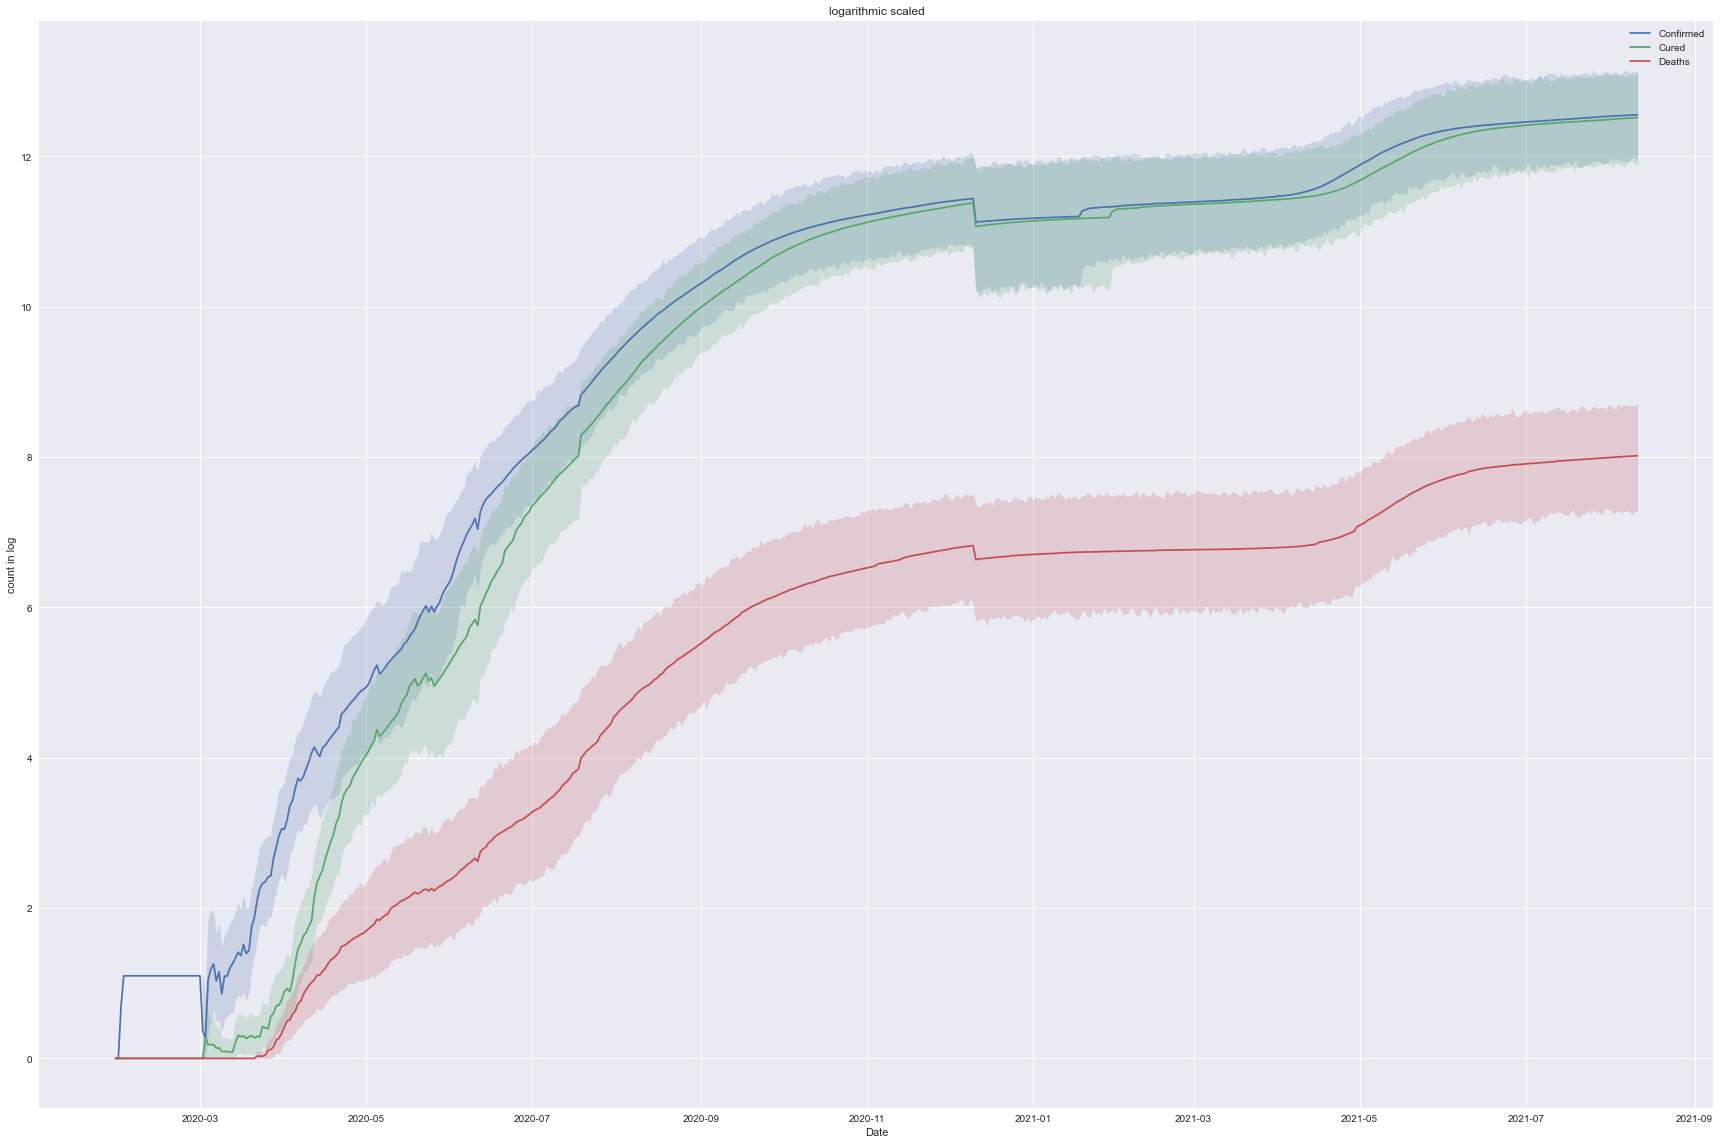

In [25]:

fig, a = plt.subplots(1,1,figsize=(30, 20));
sns.lineplot(
             x=idc['Date'], 
             y=idc['Confirmed_log'],label = "Confirmed").set_ylabel('count in log');
sns.lineplot(
             x=idc['Date'], 
             y=idc['Cured_log'],label = "Cured");
sns.lineplot(
             x=idc['Date'], 
             y=idc['Deaths_log'], label = "Deaths");
plt.title('logarithmic scaled')
plt.legend();
plt.show();

In [26]:
swv = statewise_data.copy()
swv['Updated On'] = pd.to_datetime(swv['Updated On'],format='%d/%m/%Y')
swv.rename(columns={'Updated On': 'date', ' Covaxin (Doses Administered)': 'covaxin', 'CoviShield (Doses Administered)': 'covishield','Sputnik V (Doses Administered)':'sputnik_v'}, inplace=True)
swv = swv[['date','covaxin','covishield','sputnik_v','State']]



In [27]:
e = swv.groupby(['State'])

In [28]:
e.get_group('Delhi').sum()

covaxin                                             218692040.0
covishield                                          592068871.0
sputnik_v                                             1017693.0
State         DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...
dtype: object

In [29]:
# Kerala,
# Delhi, Rajasthan, Haryana, Uttar Pradesh, Tamil Nadu

kerala = swv[swv['State']=="Kerala"]
kerala.head()


,date,covaxin,covishield,sputnik_v,State
3605,2021-01-16,0.0,1681.0,NaN,Kerala
3606,2021-01-17,0.0,1836.0,NaN,Kerala
3607,2021-01-18,0.0,2566.0,NaN,Kerala
3608,2021-01-19,0.0,5355.0,NaN,Kerala
3609,2021-01-20,0.0,5398.0,NaN,Kerala


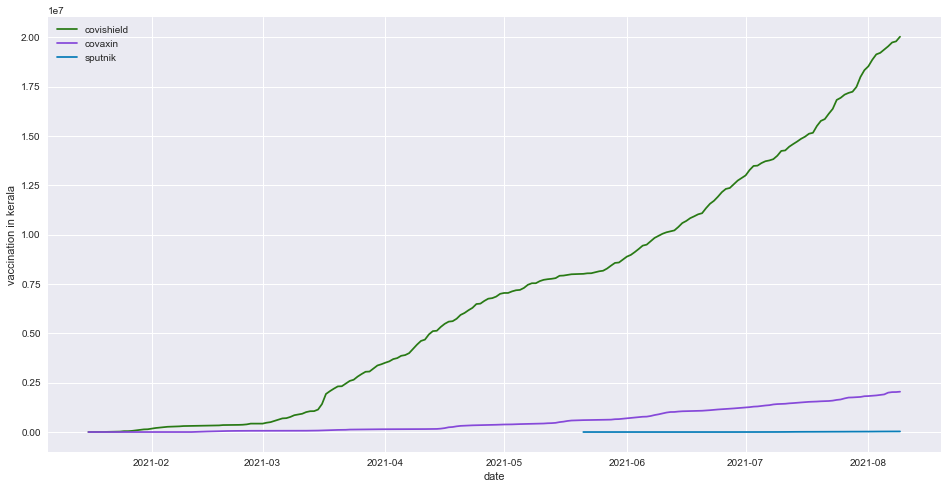

In [30]:
plt.rcParams["figure.figsize"] = (16,8)
sns.lineplot(x=kerala['date'],y=kerala['covishield'],label='covishield',color='#297A15').set_ylabel('vaccination in kerala')
sns.lineplot(x=kerala['date'],y=kerala['covaxin'],label='covaxin',color='#8649D9')
sns.lineplot(x=kerala['date'],y=kerala['sputnik_v'],label='sputnik',color='#097DB8')
plt.show()

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

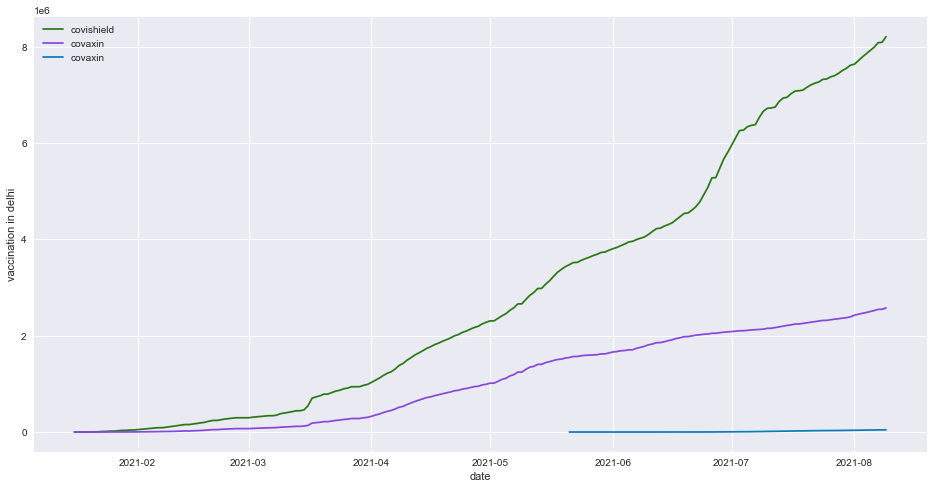

In [31]:
# Kerala,
# Delhi, Rajasthan, Haryana, Uttar Pradesh, Tamil Nadu

delhi = swv[swv['State']=="Delhi"]
sns.lineplot(x=delhi['date'],y=delhi['covishield'],label='covishield',color='#297A15').set_ylabel('vaccination in delhi')
sns.lineplot(x=delhi['date'],y=delhi['covaxin'],label='covaxin',color='#8649D9')
sns.lineplot(x=delhi['date'],y=delhi['sputnik_v'],label='covaxin',color='#097DB8')
plt.title

<AxesSubplot:xlabel='date', ylabel='vaccination in Rajasthan'>

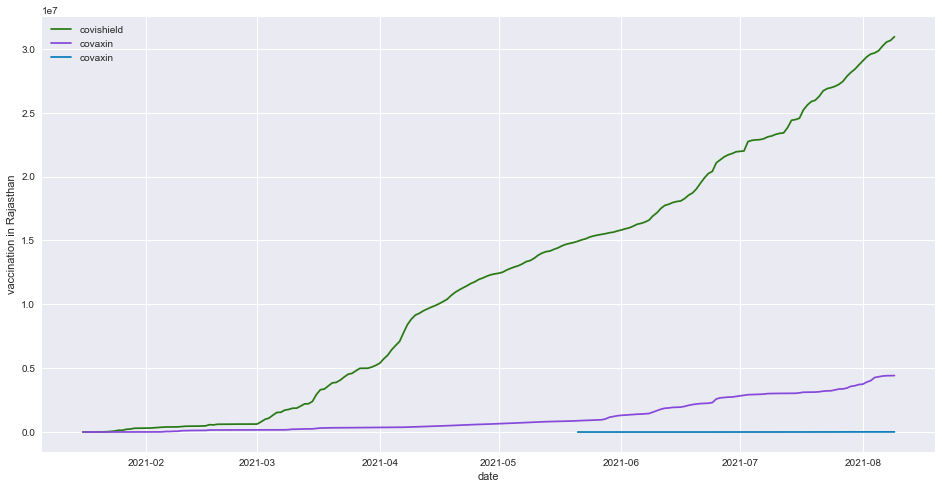

In [32]:
# Kerala,
# Delhi, Rajasthan, Haryana, Uttar Pradesh, Tamil Nadu

rajasthan = swv[swv['State']=="Rajasthan"]
sns.lineplot(x=rajasthan['date'],y=rajasthan['covishield'],label='covishield',color='#297A15').set_ylabel('vaccination in Rajasthan')
sns.lineplot(x=rajasthan['date'],y=rajasthan['covaxin'],label='covaxin',color='#8649D9')
sns.lineplot(x=rajasthan['date'],y=rajasthan['sputnik_v'],label='covaxin',color='#097DB8')

<AxesSubplot:xlabel='date', ylabel='vaccination in Haryana'>

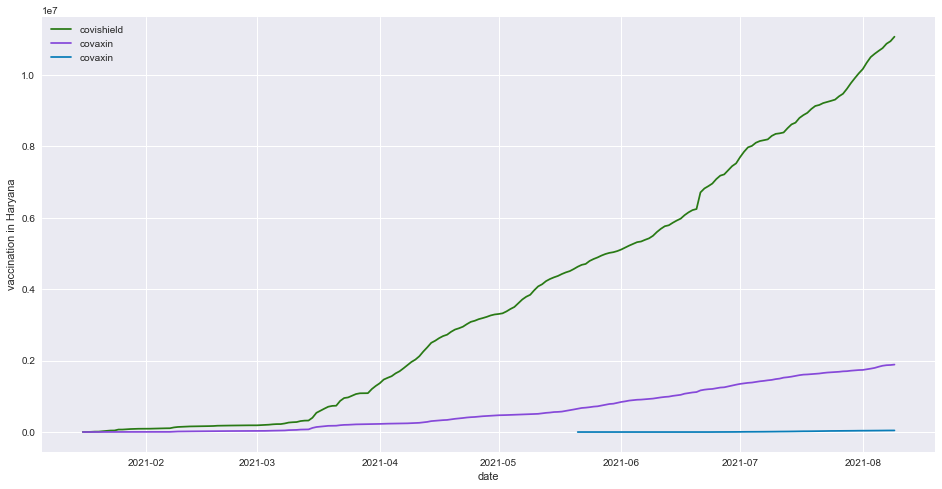

In [33]:
# Kerala,
# Delhi, Rajasthan, Haryana, Uttar Pradesh, Tamil Nadu

Haryana = swv[swv['State']=="Haryana"]
sns.lineplot(x=Haryana['date'],y=Haryana['covishield'],label='covishield',color='#297A15').set_ylabel('vaccination in Haryana')
sns.lineplot(x=Haryana['date'],y=Haryana['covaxin'],label='covaxin',color='#8649D9')
sns.lineplot(x=Haryana['date'],y=Haryana['sputnik_v'],label='covaxin',color='#097DB8')

<AxesSubplot:xlabel='date', ylabel='vaccination in Uttar Pradesh'>

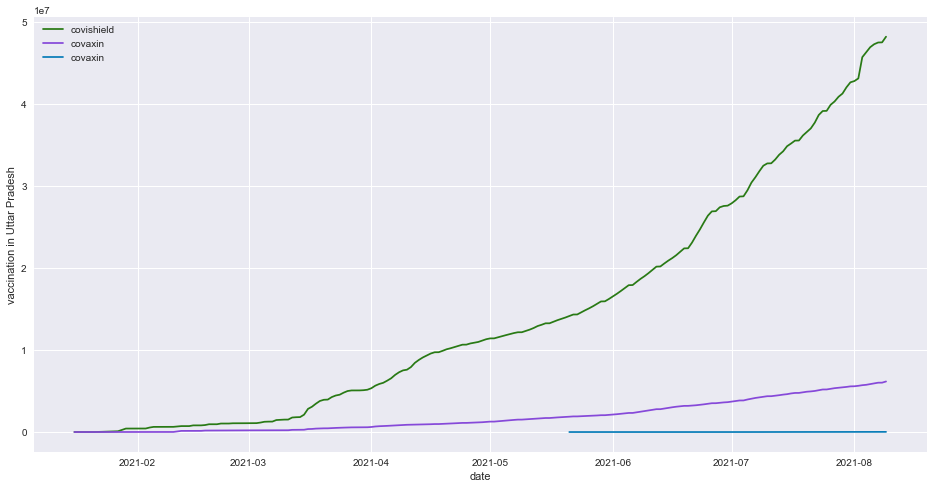

In [34]:
# Kerala,
# Delhi, Rajasthan, Haryana, Uttar Pradesh, Tamil Nadu

UttarPradesh = swv[swv['State']=="Uttar Pradesh"]
sns.lineplot(x=UttarPradesh['date'],y=UttarPradesh['covishield'],label='covishield',color='#297A15').set_ylabel('vaccination in Uttar Pradesh')
sns.lineplot(x=UttarPradesh['date'],y=UttarPradesh['covaxin'],label='covaxin',color='#8649D9')
sns.lineplot(x=UttarPradesh['date'],y=UttarPradesh['sputnik_v'],label='covaxin',color='#097DB8')

<AxesSubplot:xlabel='date', ylabel='vaccination in Tamil Nadu'>

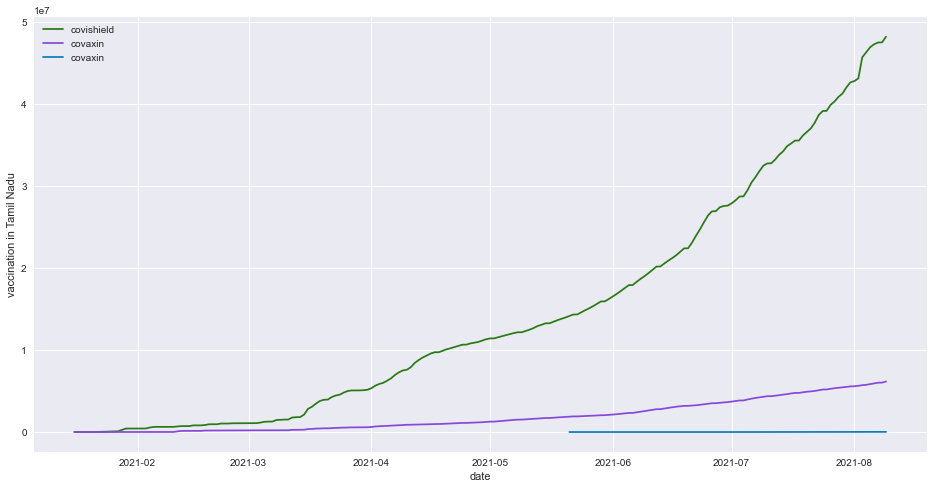

In [35]:
# Kerala,
# Delhi, Rajasthan, Haryana, Uttar Pradesh, Tamil Nadu

TamilNadu = swv[swv['State']=="Uttar Pradesh"]
sns.lineplot(x=TamilNadu['date'],y=TamilNadu['covishield'],label='covishield',color='#297A15').set_ylabel('vaccination in Tamil Nadu')
sns.lineplot(x=TamilNadu['date'],y=TamilNadu['covaxin'],label='covaxin',color='#8649D9')
sns.lineplot(x=TamilNadu['date'],y=TamilNadu['sputnik_v'],label='covaxin',color='#097DB8')

In [36]:
import os
base_dir = '/Users/ramyanee/Downloads/ML/Mask Dataset'

with_mask = os.path.join(base_dir, 'with_mask')
without_mask = os.path.join(base_dir, 'without_mask')


/Users/ramyanee/Downloads/ML/Mask Dataset

In [37]:
list_m = os.listdir( with_mask )
list_wm = os.listdir( without_mask )

print(list_m[:10])
print(list_wm[:10])

['with_mask_40.jpg', 'with_mask_54.jpg', 'with_mask_68.jpg', 'with_mask_83.jpg', 'with_mask_229.jpg', 'with_mask_97.jpg', 'with_mask_201.jpg', 'with_mask_215.jpg', 'with_mask_349.jpg', 'with_mask_413.jpg']
['without_mask_293.jpg', 'without_mask_287.jpg', 'without_mask_278.jpg', 'without_mask_250.jpg', 'without_mask_244.jpg', 'without_mask_126.jpg', 'without_mask_132.jpg', 'without_mask_19.jpg', 'without_mask_481.jpg', 'without_mask_31.jpg']


In [38]:
len(list_m)

500

In [39]:
l = min(len(list_m),len(list_wm)) - 6
l

494

###DISPLAYING PICTURES WITH MASK




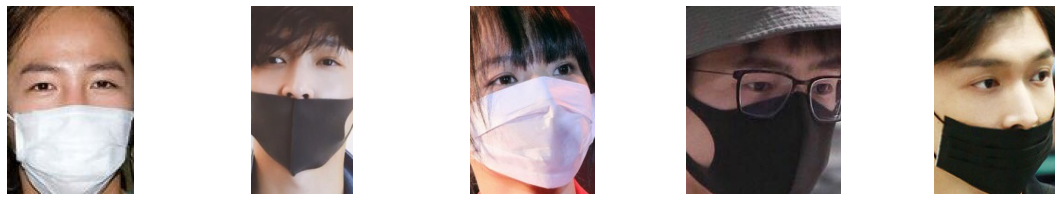

In [40]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

r = 5
c = 5
i = np.random.randint(l) 
fig = plt.gcf()
fig.set_size_inches(c*4, r*4)

m = [os.path.join(with_mask, j) 
                for j in list_m[ i:i+5] 
               ]

for a, img_path in enumerate(m):
  sp = plt.subplot(r, c, a + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()



###DISPLAYING PICTURES WITHOUT MASK

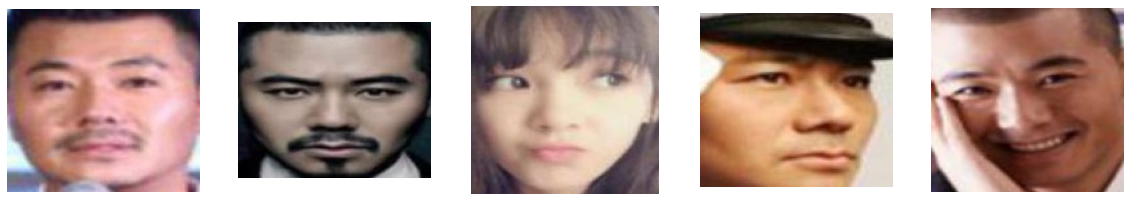

In [41]:
fig = plt.gcf()
fig.set_size_inches(c*4, r*4)
i = np.random.randint(l) 

wm = [os.path.join(without_mask, k) 
                for k in list_wm[ i:i+5]
               ]

for a, img_path in enumerate(wm):
  sp = plt.subplot(r, c, a + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [42]:
masked_images_list = [os.path.join(with_mask, j) 
                for j in list_m
               ]
with_mask_images_grey = []            
for ip in masked_images_list:
  image = mpimg.imread(ip)
  image = resize(image,(28,28))
  R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
  igrey = 0.2989 * R + 0.5870 * G + 0.1140 * B
  igrey = igrey.flatten()
  igrey = list(igrey)
  with_mask_images_grey.append(igrey)
  
  


In [43]:
without_masked_images = [os.path.join(without_mask, j) 
                for j in list_wm
               ]
without_mask_images_grey = []            
for ip in without_masked_images:
  image = mpimg.imread(ip)
  image = resize(image,(28,28))
  R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
  igrey = 0.2989 * R + 0.5870 * G + 0.1140 * B
  igrey = igrey.flatten()
  igrey = list(igrey)
  without_mask_images_grey.append(igrey)

In [44]:
fgim = pd.DataFrame(with_mask_images_grey)
fgiwm = pd.DataFrame(without_mask_images_grey)
fgim['type'] = 'with_mask'
fgiwm['type'] = 'without_mask'

In [45]:
np.matrix(fgim).shape

(500, 785)

In [46]:
flattenGreyImagesCombined = fgiwm.append(fgim,ignore_index = True)

In [47]:
flattenGreyImagesCombined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, 0 to type
dtypes: float64(784), object(1)
memory usage: 6.0+ MB


In [48]:
flattenGreyImagesCombined

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,type
0,0.069089,0.193404,0.452148,0.514155,0.528275,0.544802,0.643615,0.648778,0.602802,0.608782,...,0.849296,0.832129,0.817538,0.803824,0.699178,0.290808,0.215729,0.515570,0.829911,without_mask
1,0.052143,0.065577,0.088281,0.136536,0.168057,0.164139,0.121227,0.104791,0.094144,0.076924,...,0.493876,0.281858,0.212806,0.210451,0.205154,0.212115,0.225206,0.237918,0.244261,without_mask
2,0.901769,0.900244,0.888546,0.864086,0.835106,0.798413,0.709187,0.550891,0.291358,0.194158,...,0.908445,0.890281,0.869395,0.857494,0.832636,0.815479,0.786843,0.721841,0.639346,without_mask
3,0.150430,0.139411,0.142314,0.143465,0.157278,0.162501,0.162517,0.164629,0.151652,0.153463,...,0.401824,0.266385,0.190860,0.162913,0.118192,0.108903,0.117160,0.130961,0.144270,without_mask
4,0.164193,0.159665,0.153177,0.139917,0.164387,0.152050,0.147480,0.227655,0.341326,0.447946,...,0.180558,0.139790,0.126649,0.117527,0.090848,0.103511,0.107260,0.119128,0.128122,without_mask
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.559757,0.624524,0.717365,0.765801,0.789526,0.789402,0.779639,0.759204,0.756722,0.750851,...,0.160386,0.153432,0.153352,0.206355,0.413954,0.699594,0.787255,0.801547,0.809985,with_mask
996,0.392585,0.404810,0.411961,0.413842,0.423674,0.420997,0.423463,0.432689,0.440064,0.457011,...,0.559032,0.556000,0.530354,0.419713,0.146010,0.054298,0.099627,0.125977,0.122976,with_mask
997,0.033398,0.029011,0.060672,0.113618,0.122923,0.121776,0.162589,0.210920,0.235328,0.263717,...,0.045104,0.032054,0.023594,0.025912,0.028687,0.041306,0.058818,0.079563,0.124569,with_mask
998,0.357007,0.359246,0.249488,0.171765,0.167335,0.169646,0.220861,0.284969,0.310301,0.332102,...,0.536281,0.568037,0.576964,0.578466,0.604247,0.631270,0.653496,0.673686,0.696852,with_mask


In [49]:
# flattenGreyImagesCombined = flattenGreyImagesCombined.sample(frac = 1)

In [50]:
tsne_1 = TSNE(n_components=2).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_1 = pd.DataFrame(tsne_1)
tsne_1.loc[0:500,'type']='without_mask'
tsne_1.loc[500:1000,'type']='with_mask'

Text(0.5, 1.0, 'with default perplexity')

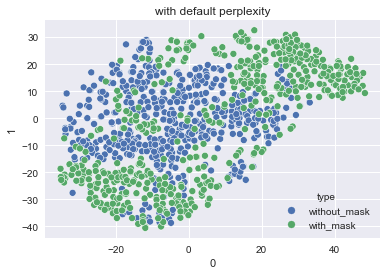

In [51]:
sns.scatterplot(x=tsne_1[0],y=tsne_1[1],hue=tsne_1['type'])
plt.title('with default perplexity')

Text(0.5, 1.0, 'with perplexity = 2')

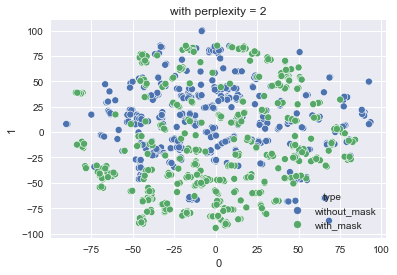

In [52]:
tsne_2 = TSNE(n_components=2, perplexity=2).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_2 = pd.DataFrame(tsne_2)
tsne_2.loc[0:500,'type']='without_mask'
tsne_2.loc[500:1000,'type']='with_mask'
sns.scatterplot(x=tsne_2[0],y=tsne_2[1],hue=tsne_2['type'])
plt.title('with perplexity = 2')

Text(0.5, 1.0, 'with perplexity = 10')

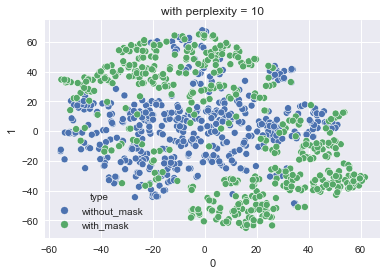

In [53]:
tsne_2 = TSNE(n_components=2, perplexity=10).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_2 = pd.DataFrame(tsne_2)
tsne_2.loc[0:500,'type']='without_mask'
tsne_2.loc[500:1000,'type']='with_mask'
sns.scatterplot(x=tsne_2[0],y=tsne_2[1],hue=tsne_2['type'])
plt.title('with perplexity = 10')

Text(0.5, 1.0, 'with perplexity = 20, iterations = 5000')

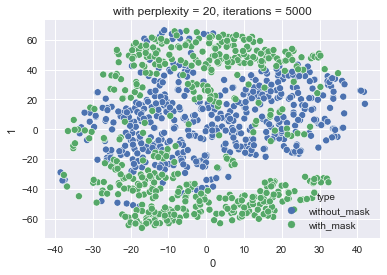

In [54]:
tsne_2 = TSNE(n_components=2, perplexity=20, n_iter=5000).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_2 = pd.DataFrame(tsne_2)
tsne_2.loc[0:500,'type']='without_mask'
tsne_2.loc[500:1000,'type']='with_mask'
sns.scatterplot(x=tsne_2[0],y=tsne_2[1],hue=tsne_2['type'])
plt.title('with perplexity = 20, iterations = 5000')

Text(0.5, 1.0, 'with perplexity = 50, iteration = 5000')

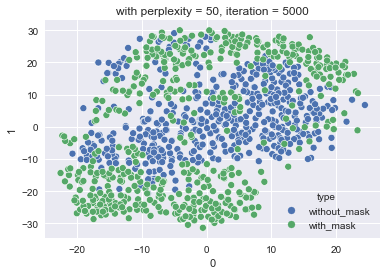

In [55]:
tsne_2 = TSNE(n_components=2, perplexity=50, n_iter=5000 ).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_2 = pd.DataFrame(tsne_2)
tsne_2.loc[0:500,'type']='without_mask'
tsne_2.loc[500:1000,'type']='with_mask'
sns.scatterplot(x=tsne_2[0],y=tsne_2[1],hue=tsne_2['type'])
plt.title('with perplexity = 50, iteration = 5000')

Text(0.5, 1.0, 'with perplexity = 50')

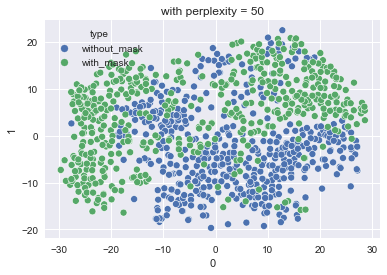

In [56]:
tsne_2 = TSNE(n_components=2, perplexity=50).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_2 = pd.DataFrame(tsne_2)
tsne_2.loc[0:500,'type']='without_mask'
tsne_2.loc[500:1000,'type']='with_mask'
sns.scatterplot(x=tsne_2[0],y=tsne_2[1],hue=tsne_2['type'])
plt.title('with perplexity = 50')

Text(0.5, 1.0, 'with perplexity = 70')

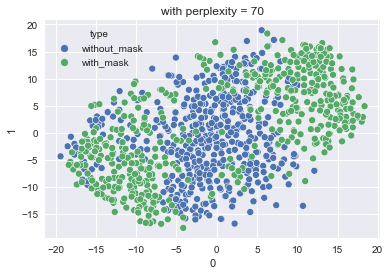

In [57]:
tsne_2 = TSNE(n_components=2, perplexity=70).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_2 = pd.DataFrame(tsne_2)
tsne_2.loc[0:500,'type']='without_mask'
tsne_2.loc[500:1000,'type']='with_mask'
sns.scatterplot(x=tsne_2[0],y=tsne_2[1],hue=tsne_2['type'])
plt.title('with perplexity = 70')

Text(0.5, 1.0, 'with perplexity = 100')

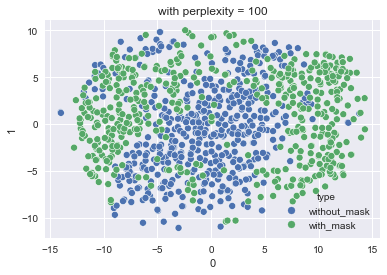

In [58]:
tsne_2 = TSNE(n_components=2, perplexity=100).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_2 = pd.DataFrame(tsne_2)
tsne_2.loc[0:500,'type']='without_mask'
tsne_2.loc[500:1000,'type']='with_mask'
sns.scatterplot(x=tsne_2[0],y=tsne_2[1],hue=tsne_2['type'])
plt.title('with perplexity = 100')

Text(0.5, 1.0, 'with perplexity = 200')

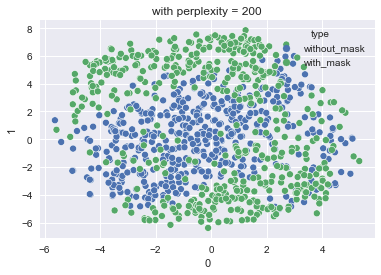

In [59]:
tsne_2 = TSNE(n_components=2, perplexity=200).fit_transform(flattenGreyImagesCombined.drop('type',axis = 1))
tsne_2 = pd.DataFrame(tsne_2)
tsne_2.loc[0:500,'type']='without_mask'
tsne_2.loc[500:1000,'type']='with_mask'
sns.scatterplot(x=tsne_2[0],y=tsne_2[1],hue=tsne_2['type'])
plt.title('with perplexity = 200')